# **1.- Determinación de variables clínicas y biomédicas más relevantes**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [15]:
# Cargar el dataset
file_path = '../data/processed/df_cancer_prostata_processed.csv'
df = pd.read_csv(file_path)


In [16]:
# Mostrar las primeras filas y un resumen de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 66 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   RELIGION1                                 2644 non-null   object 
 1   ETNIA                                     2644 non-null   object 
 2   ZONA_VIVIENDA                             2644 non-null   object 
 3   COMUNA                                    2644 non-null   object 
 4   REGION                                    2644 non-null   object 
 5   SSREFERENCIA                              2644 non-null   object 
 6   RECINTO_PROCEDE                           2644 non-null   object 
 7   ESTABLE_DESTINO                           2644 non-null   object 
 8   ACT_LABORAL                               2644 non-null   object 
 9   ACT_EMPRESA                               2644 non-null   object 
 10  SITUACION_LABORAL                   

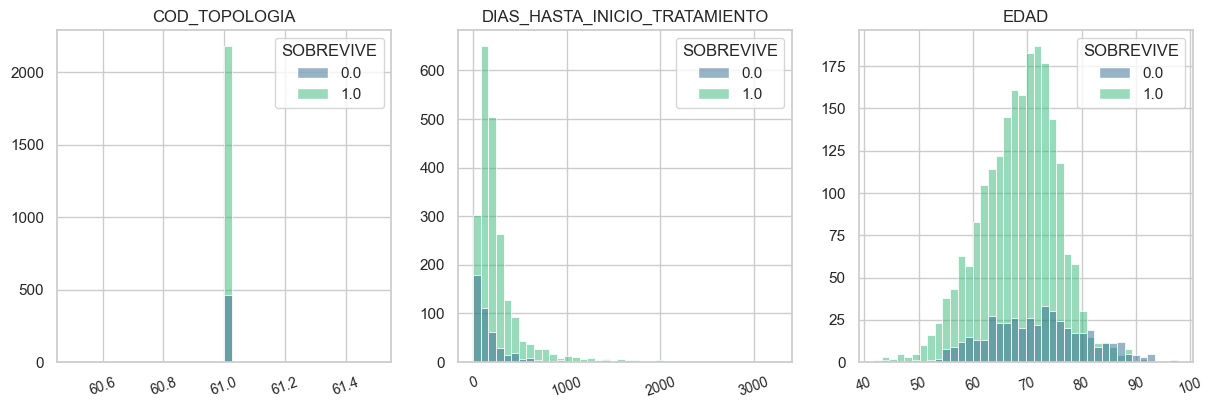

In [17]:


# Seleccionar las columnas deseadas
columnas_deseadas = ['COD_TOPOLOGIA','DIAS_HASTA_INICIO_TRATAMIENTO','EDAD']
df_nuevo = df[columnas_deseadas]
fig = plt.figure(figsize = (25, 25))

i = 1
for n in df_nuevo.columns:
    plt.subplot(5, 5, i)
    ax = sns.histplot(x = df[n], hue = df['SOBREVIVE'], palette = "viridis", bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

<class 'pandas.core.series.Series'>
RangeIndex: 2644 entries, 0 to 2643
Series name: SOBREVIVE
Non-Null Count  Dtype  
--------------  -----  
2644 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB
SOBREVIVE
1.0    2181
0.0     463
Name: count, dtype: int64


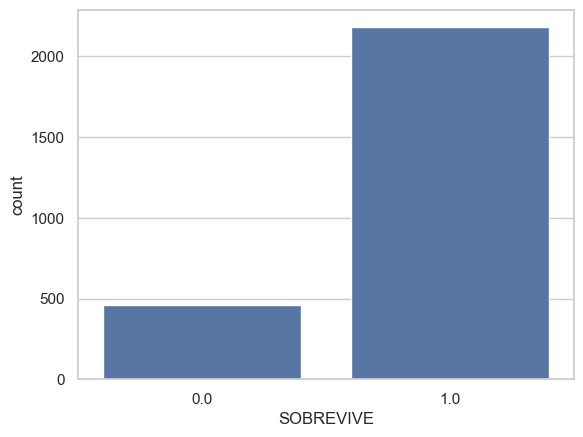

In [18]:
df['SOBREVIVE'].info()

# Gráfico de resultado de la variable target (0: No Hipertensión; 1: Hipertensión)
import seaborn as sns
print(df['SOBREVIVE'].value_counts())
_ = sns.countplot(x='SOBREVIVE', data=df)

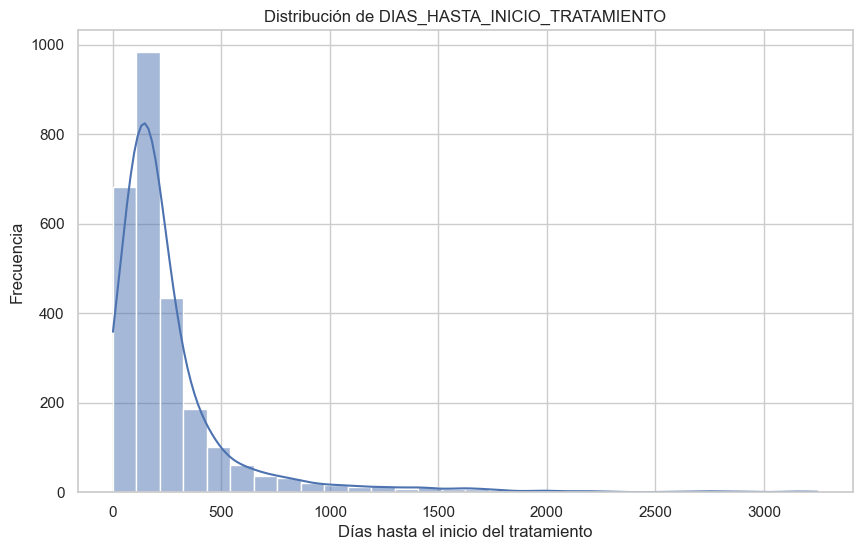

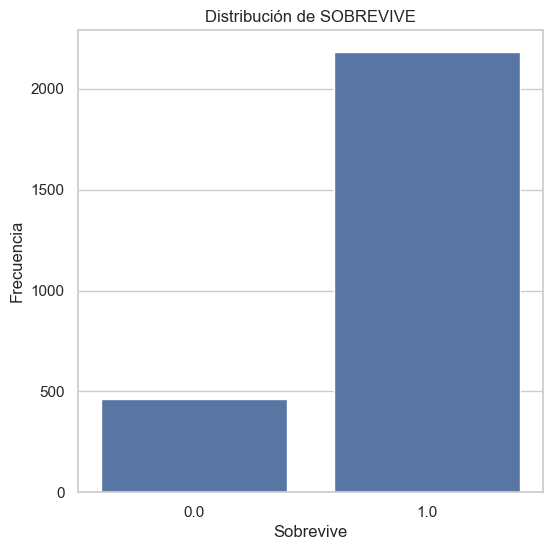

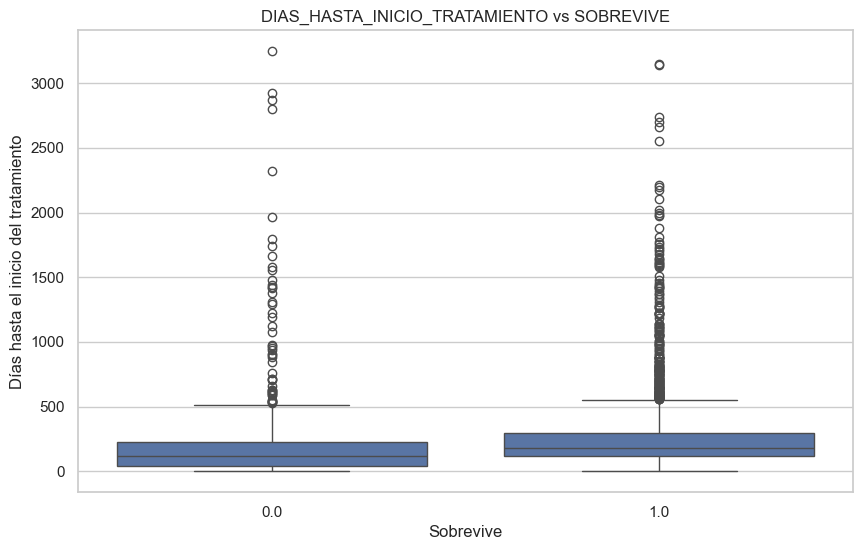

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las visualizaciones
sns.set(style="whitegrid")

# Visualización de la distribución de la variable DIAS_HASTA_INICIO_TRATAMIENTO
plt.figure(figsize=(10, 6))
sns.histplot(df['DIAS_HASTA_INICIO_TRATAMIENTO'], bins=30, kde=True)
plt.title('Distribución de DIAS_HASTA_INICIO_TRATAMIENTO')
plt.xlabel('Días hasta el inicio del tratamiento')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable SOBREVIVE
plt.figure(figsize=(6, 6))
sns.countplot(x='SOBREVIVE', data=df)
plt.title('Distribución de SOBREVIVE')
plt.xlabel('Sobrevive')
plt.ylabel('Frecuencia')
plt.show()


# Relación entre DIAS_HASTA_INICIO_TRATAMIENTO y SOBREVIVE
plt.figure(figsize=(10, 6))
sns.boxplot(x='SOBREVIVE', y='DIAS_HASTA_INICIO_TRATAMIENTO', data=df)
plt.title('DIAS_HASTA_INICIO_TRATAMIENTO vs SOBREVIVE')
plt.xlabel('Sobrevive')
plt.ylabel('Días hasta el inicio del tratamiento')
plt.show()


Análisis de Visualizaciones
Distribución de DIAS_HASTA_INICIO_TRATAMIENTO:

La mayoría de los pacientes inician el tratamiento dentro de los primeros 500 días, con una notable disminución en la frecuencia a medida que los días aumentan.
Hay algunos valores atípicos que muestran un inicio del tratamiento después de los 1000 días.
Distribución de SOBREVIVE:

La mayoría de los pacientes en el dataset han sobrevivido (SOBREVIVE=1), con una proporción significativamente menor que no ha sobrevivido (SOBREVIVE=0).
Distribución de SEXO:

Todos los pacientes en el dataset son de sexo masculino, lo cual es consistente con el enfoque en el cáncer de próstata.
Relación entre DIAS_HASTA_INICIO_TRATAMIENTO y SOBREVIVE:

No parece haber una diferencia significativa en los días hasta el inicio del tratamiento entre los que sobreviven y los que no sobreviven, aunque los que no sobreviven parecen tener un rango ligeramente más amplio y algunos valores atípicos más altos.

Análisis de Supervivencia

Procederemos ahora con el análisis de supervivencia utilizando las curvas de Kaplan-Meier para evaluar cómo diferentes factores afectan la supervivencia de los pacientes.

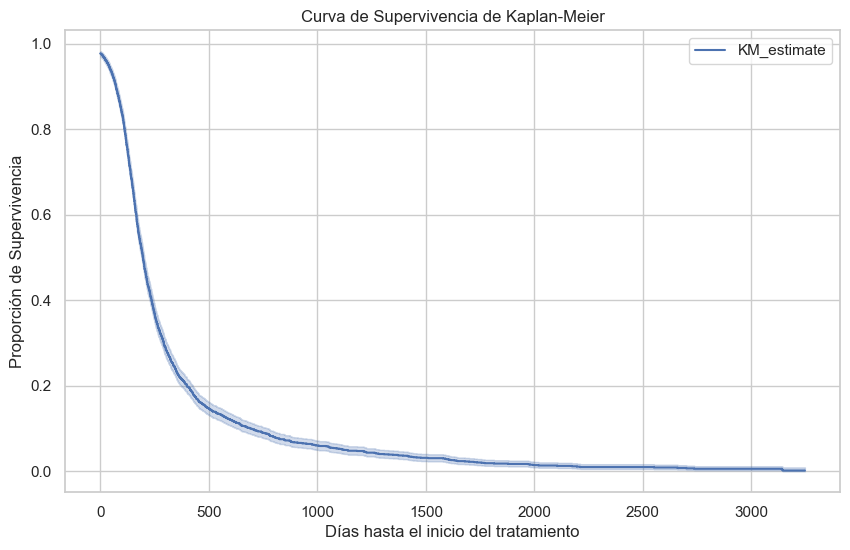

In [20]:
from lifelines import KaplanMeierFitter

# Preparar los datos para el análisis de supervivencia
survival_data = df[['DIAS_HASTA_INICIO_TRATAMIENTO', 'SOBREVIVE']]

# Ajustar la curva de Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(durations=survival_data['DIAS_HASTA_INICIO_TRATAMIENTO'], event_observed=survival_data['SOBREVIVE'])

# Visualizar la curva de Kaplan-Meier
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días hasta el inicio del tratamiento')
plt.ylabel('Proporción de Supervivencia')
plt.show()


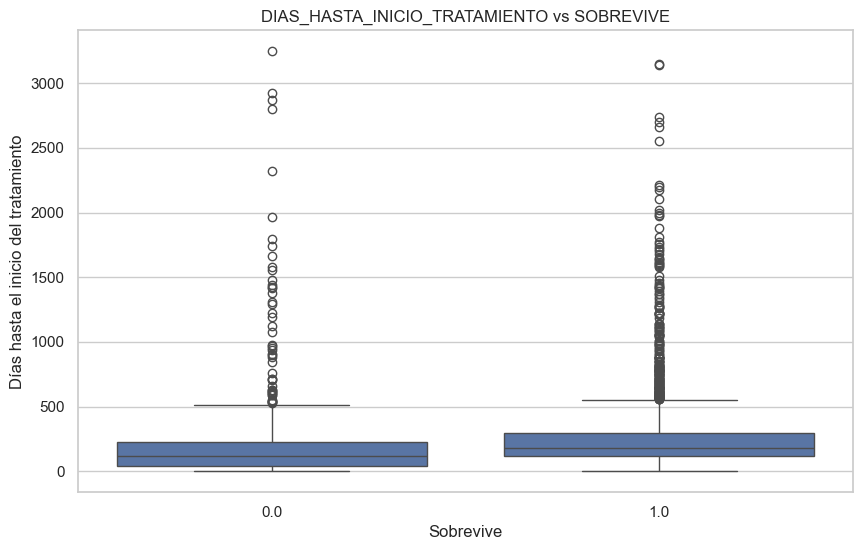

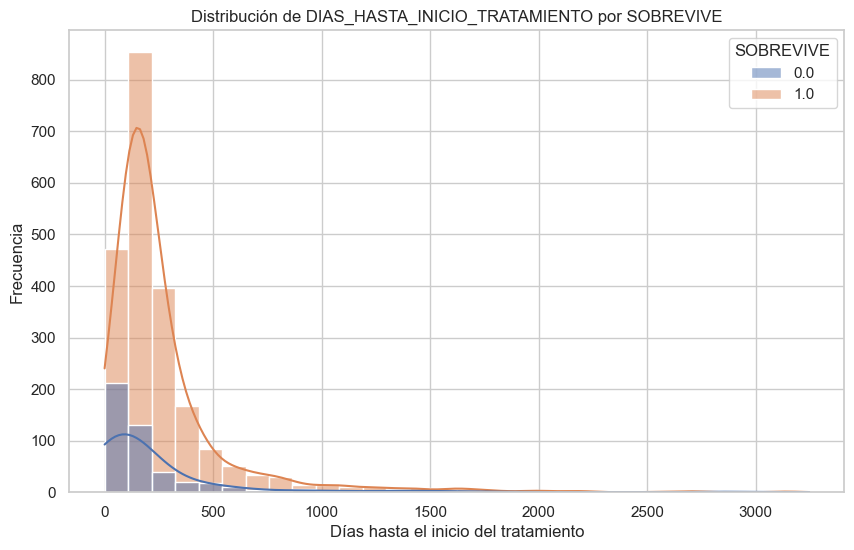

In [21]:
# Boxplot de DIAS_HASTA_INICIO_TRATAMIENTO en relación con SOBREVIVE
plt.figure(figsize=(10, 6))
sns.boxplot(x='SOBREVIVE', y='DIAS_HASTA_INICIO_TRATAMIENTO', data=df)
plt.title('DIAS_HASTA_INICIO_TRATAMIENTO vs SOBREVIVE')
plt.xlabel('Sobrevive')
plt.ylabel('Días hasta el inicio del tratamiento')
plt.show()

# Histograma de DIAS_HASTA_INICIO_TRATAMIENTO en relación con SOBREVIVE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DIAS_HASTA_INICIO_TRATAMIENTO', hue='SOBREVIVE', bins=30, kde=True)
plt.title('Distribución de DIAS_HASTA_INICIO_TRATAMIENTO por SOBREVIVE')
plt.xlabel('Días hasta el inicio del tratamiento')
plt.ylabel('Frecuencia')
plt.show()


**Análisis de Supervivencia Basado en DIAS_HASTA_INICIO_TRATAMIENTO y SOBREVIVE

1. Boxplot de DIAS_HASTA_INICIO_TRATAMIENTO vs SOBREVIVE:

No parece haber una diferencia significativa en los días hasta el inicio del tratamiento entre los que sobreviven y los que no sobreviven. Sin embargo, hay algunos valores atípicos que se destacan, especialmente en aquellos que no sobreviven.

2. Histograma de DIAS_HASTA_INICIO_TRATAMIENTO por SOBREVIVE:

La mayoría de los pacientes que sobreviven comienzan su tratamiento dentro de los primeros 500 días.
Para los que no sobreviven, la distribución también es similar, pero hay algunos casos con un inicio de tratamiento mucho más tardío.